In [47]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import os
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
dataset = pd.read_csv('dataset.csv',sep=',')
dataset.head()
drop_list = ['creationdate','bin']
dataset = dataset.drop(drop_list,axis=1)
dataset.head()

,amount,fraud_refusal,fraud,declined,rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25,rule_26,rule_27,rule_28,rule_29,rule_30,rule_31,rule_32,rule_33,rule_34,rule_35,rule_36,rule_37,rule_38,rule_39,rule_40,rule_41,rule_42,rule_43,rule_44,rule_45,rule_46,rule_47,rule_48,rule_49,rule_50,rule_51,rule_52,rule_53,rule_54,rule_55,rule_56,rule_57,rule_58,rule_59,rule_60,rule_61,rule_62,rule_63,rule_64,rule_65,rule_66,rule_67,rule_68,rule_69,rule_70,rule_71,rule_72,rule_73,rule_74,rule_75,rule_76,rule_77,rule_78
0,1650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21800,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
y_col = 'fraud'
X = dataset.drop(y_col,axis=1)
y = dataset['fraud']

In [50]:
dataset.describe()

,amount,fraud_refusal,fraud,declined,rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25,rule_26,rule_27,rule_28,rule_29,rule_30,rule_31,rule_32,rule_33,rule_34,rule_35,rule_36,rule_37,rule_38,rule_39,rule_40,rule_41,rule_42,rule_43,rule_44,rule_45,rule_46,rule_47,rule_48,rule_49,rule_50,rule_51,rule_52,rule_53,rule_54,rule_55,rule_56,rule_57,rule_58,rule_59,rule_60,rule_61,rule_62,rule_63,rule_64,rule_65,rule_66,rule_67,rule_68,rule_69,rule_70,rule_71,rule_72,rule_73,rule_74,rule_75,rule_76,rule_77,rule_78
count,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000,198647.0,198647.000000,198647.000000,198647.000000,198647.0,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000,198647.0,198647.0,198647.0,198647.000000,198647.0,198647.0,198647.0,198647.0,198647.0,198647.000000,198647.000000,198647.0,198647.0,198647.000000,198647.000000,198647.0,198647.000000,198647.0,198647.0,198647.0,198647.0,198647.0,198647.0,198647.0,198647.000000,198647.0,198647.0,198647.000000,198647.0,198647.000000,198647.0,198647.0,198647.0,198647.0,198647.000000,198647.000000,198647.000000,198647.000000,198647.000000,198647.00000,198647.000000,198647.0,198647.000000,198647.000000,198647.000000,198647.0,198647.0,198647.0,198647.0,198647.000000,198647.0,198647.000000,198647.000000,198647.0,198647.000000,198647.0,198647.0,198647.000000,198647.000000,198647.0,198647.0,198647.000000,198647.000000,198647.000000,198647.0,198647.000000,198647.000000
mean,2842.314875,0.103817,0.005945,0.034106,0.015389,0.0,0.020977,0.030421,0.004722,0.0,0.151304,0.035717,0.043650,0.000785,0.131540,0.0,0.0,0.0,0.009373,0.0,0.0,0.0,0.0,0.0,0.000030,0.101260,0.0,0.0,0.000101,0.020061,0.0,0.000050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000191,0.0,0.0,0.000695,0.0,0.000096,0.0,0.0,0.0,0.0,0.004561,0.022336,0.010063,0.044118,0.023484,0.02361,0.078833,0.0,0.000997,0.003811,0.013899,0.0,0.0,0.0,0.0,0.018873,0.0,0.021742,0.010899,0.0,0.021123,0.0,0.0,0.016275,0.018359,0.0,0.0,0.010013,0.292494,0.018203,0.0,0.042508,0.004641
std,1741.657910,0.305024,0.076876,0.181501,0.123095,0.0,0.143307,0.171743,0.068554,0.0,0.358345,0.185583,0.204316,0.028012,0.337991,0.0,0.0,0.0,0.096362,0.0,0.0,0.0,0.0,0.0,0.005496,0.301673,0.0,0.0,0.010034,0.140208,0.0,0.007095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013830,0.0,0.0,0.026348,0.0,0.009779,0.0,0.0,0.0,0.0,0.067380,0.147775,0.099809,0.205359,0.151435,0.15183,0.269479,0.0,0.031556,0.061614,0.117072,0.0,0.0,0.0,0.0,0.136076,0.0,0.145841,0.103827,0.0,0.143794,0.0,0.0,0.126532,0.134247,0.0,0.0,0.099562,0.454909,0.133686,0.0,0.201745,0.067970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1800.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2390.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0

In [51]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.98 * (1 - .98)))
sel.fit_transform(X)
X.columns[sel.get_support(indices=True)]
vc_list = X.columns[sel.get_support(indices=True)].tolist()
print(vc_list,"\n")

['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_7', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_47', 'rule_49', 'rule_50', 'rule_51', 'rule_52', 'rule_63', 'rule_66', 'rule_74', 'rule_77'] 



In [52]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression,chi2
import pandas as pd

selector = SelectKBest(chi2, k=15)
selector.fit(X, y)
X_new = selector.transform(X)
X_new.shape
X.columns[selector.get_support(indices=True)]
chi2_list = X.columns[selector.get_support(indices=True)].tolist()
print("Chi2 List : \n",chi2_list)

selector = SelectKBest(f_regression, k=15)
selector.fit(X, y)
X_new = selector.transform(X)
X_new.shape
X.columns[selector.get_support(indices=True)]
f_classif_list = X.columns[selector.get_support(indices=True)].tolist()
print("F Classify List: \n",f_classif_list)
    
# selector = SelectKBest(mutual_info_regression, k=15)
# selector.fit(X, y)
# X_new = selector.transform(X)
# X_new.shape
# X.columns[selector.get_support(indices=True)]
# mic_list  = X.columns[selector.get_support(indices=True)].tolist()
# print(mic_list,"MIR List \n")

Chi2 List : 
 ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']
F Classify List: 
 ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']


In [53]:
vc_list = ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_7', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_47', 'rule_49', 'rule_50', 'rule_51', 'rule_52', 'rule_63', 'rule_66', 'rule_74', 'rule_77']
chi2_list = ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']
f_classify_list = ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']
mir_list = ['rule_7', 'rule_13', 'rule_25', 'rule_28', 'rule_30', 'rule_34', 'rule_35', 'rule_37', 'rule_39', 'rule_49', 'rule_52', 'rule_54', 'rule_56', 'rule_68', 'rule_77']

var_sel = vc_list+chi2_list+f_classify_list+mir_list

X_sub = X[ X.columns.intersection(var_sel)]
y_sub = y

In [54]:
X_sub.shape

(198647, 65)

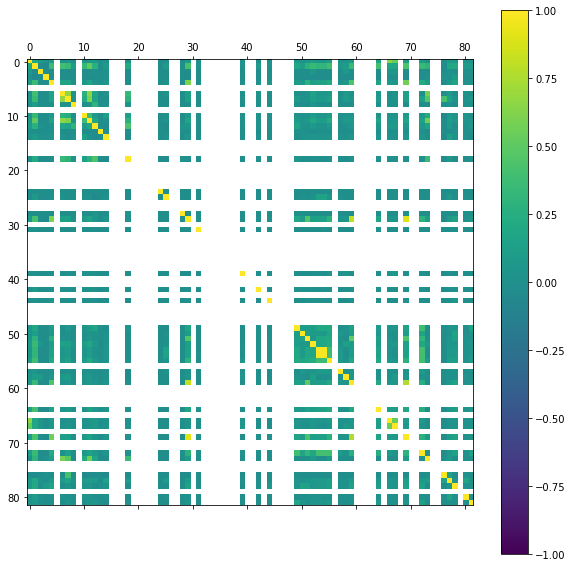

In [55]:
# correlation matrix
fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [86]:
validation_size = 0.30
seed = 17

X_train, X_test, y_train, y_test = train_test_split(X_sub,y_sub,test_size=validation_size,random_state=seed)

dtcf = ExtraTreesClassifier(max_depth=2,random_state=seed,class_weight={0: 0.50299038821873132, 1: 84.10118543607112}) 


param_grid = { 
    
    'n_estimators': list(range(2,500,5)),
    'max_depth': list(range(2,500,1)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split' : list(range(3,20,1))
}

CV_dtcf = RandomizedSearchCV(estimator=dtcf,param_distributions=param_grid, cv= 5,scoring='recall',random_state=seed,)
CV_dtcf.fit(X_train, y_train)

print (CV_dtcf.best_params_)
#print (CV_dtcf.best_score_)

predictions_train = CV_dtcf.best_estimator_.fit(X_train, y_train).predict(X_train)
print("Train ROC-AUC :",roc_auc_score(y_train, predictions_train))

# estimate accuracy on validation dataset
predictions = CV_dtcf.best_estimator_.predict(X_test)
print("Test ROC-AUC :" , roc_auc_score(y_test, predictions))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

{'n_estimators': 162, 'min_samples_split': 12, 'max_features': 'log2', 'max_depth': 437}
Train ROC-AUC : 0.944329965124
Test ROC-AUC : 0.654732653529
[[54679  4551]
 [  224   141]]
             precision    recall  f1-score   support

          0       1.00      0.92      0.96     59230
          1       0.03      0.39      0.06       365

avg / total       0.99      0.92      0.95     59595



In [73]:
y.value_counts()

0    197466
1      1181
Name: fraud, dtype: int64

In [91]:
from sklearn.utils import class_weight
keys = np.unique(dataset['fraud'])
values = class_weight.compute_class_weight('balanced',keys,dataset['fraud'].values)
cw = dict(zip(keys, values))
cw

{0: 0.50299038821873132, 1: 84.10118543607112}

In [ ]:
values